Retrieve experiment results

In [24]:
import json
from os.path import join
import os

import pandas as pd

from cogspaces.pipeline import get_output_dir

from json import JSONDecodeError

basedir_ids = [34]
basedirs = [join(get_output_dir(), 'predict_multi', str(_id), 'run') for _id in basedir_ids]
res_list = []
for basedir in basedirs:
    for exp_dir in os.listdir(basedir):
        exp_dir = join(basedir, exp_dir)
        try:
            config = json.load(open(join(exp_dir, 'config.json'), 'r'))
            info = json.load(open(join(exp_dir, 'info.json'), 'r'))
        except (JSONDecodeError, FileNotFoundError):
            continue
        datasets = config['datasets']
        datasets = '__'.join(datasets)
        alpha = config['alpha']
        beta = config['beta']
        seed = config['seed']
        model = config['model']
        source = config['source']
        score = info['score']
        rank = info['rank']
        normalized = config['with_std']
        res = {'datasets': datasets, 'alpha': alpha, 'beta': beta, 'seed': seed, 'rank': rank,
               'source': source, 'normalized': normalized,
              'model': model}
        for key, value in score.items():
            res[key] = value
        if basedir == join(get_output_dir(), 'predict_multi', '11', 'run') and model == 'logistic':
            continue
        res_list.append(res)
res = pd.DataFrame(res_list)

Compare results with trace norm, with and without transfer

In [30]:
res

,alpha,beta,datasets,model,normalized,rank,seed,source,test_amalric2012mathematicians,test_cauvet2009muslang,...,train_gauthier2009resonance,train_gauthier2010resonance,train_hcp,train_henson2010faces,train_knops2009recruitment,train_mean,train_pinel2007fast,train_pinel2009twins,train_pinel2012archi,train_vagharchakian2012temporal
0,0.000000,0.000000e+00,brainpedia__hcp,logistic,False,9,1230275727,hcp_rs_positive_single,0.888889,0.370370,...,1.000000,1.000000,0.999692,1.000000,1.000000,0.998058,1.000000,1.000000,1.000000,1.0000
1,0.000000,1.000000e-10,brainpedia__hcp,logistic,False,9,1230275727,hcp_rs_positive_single,0.888889,0.370370,...,1.000000,1.000000,0.999692,1.000000,1.000000,0.998058,1.000000,1.000000,1.000000,1.0000
2,0.000000,1.000000e-10,brainpedia__hcp,logistic,False,9,636201818,hcp_rs_positive_single,0.837037,0.277778,...,1.000000,1.000000,0.999754,1.000000,1.000000,0.998107,1.000000,1.000000,1.000000,1.0000
3,0.000000,1.000000e-06,brainpedia__hcp,logistic,False,9,1230275727,hcp_rs_positive_single,0.888889,0.370370,...,1.000000,1.000000,0.999262,1.000000,1.000000,0.997726,1.000000,1.000000,1.000000,1.0000
4,0.000000,1.000000e-05,brainpedia__hcp,logistic,False,9,1230275727,hcp_rs_positive_single,0.892593,0.365741,...,1.000000,1.000000,0.990340,1.000000,1.000000,0.990858,1.000000,1.000000,1.000000,1.0000
5,0.000000,1.000000e-04,brainpedia__hcp,logistic,False,9,1230275727,hcp_rs_positive_single,0.903704,0.356481,...,1.000000,1.000000,0.958100,1.000000,1.000000,0.965231,0.983333,1.000000,0.994555,1.0000
6,0.000000,1.000000e-06,brainpedia__hcp,logistic,False,9,636201818,hcp_rs_positive_single,0.837037,0.277778,...,1.000000,1.000000,0.999323,1.000000,1.000000,0.997775,1.000000,1.000000,1.000000,1.0000
7,0.000000,1.000000e-07,brainpedia__hcp,logistic,False,9,1230275727,hcp_rs_positive_single,0.888889,0.370370,...,1.000000,1.000000,0.999631,1.000000,1.000000,0.998011,1.000000,1.000000,1.000000,1.0000
8,0.000000,1.000000e-08,brainpedia__hcp,logistic,False,9,1230275727,hcp_rs_positive_single,0.888889,0.370370,...,1.000000,1.000000,0.999692,1.000000,1.000000,0.998058,1.000000,1.000000,1.000000,1.0000
9,0.000000,1.000000e-07,brainpedia__hcp,logistic,False,9,636201818,hcp_rs_positive_single,0.837037,0.277778,...,1.000000,1.000000,0.999692,1.000000,1.000000,0.998059,1.000000,1.000000,1.000000,1.0000


In [31]:
df_agg = res.groupby(by=['normalized', 'source', 'model', 'datasets', 'alpha', 'beta']).aggregate(['mean', 'std'])

df_agg = df_agg.fillna(0)


dfs = {}
for dataset in ['brainpedia']:
    this_df = df_agg.query("datasets in ['%s__hcp', '%s']" % (dataset, dataset))
    indices = this_df[('test_mean', 'mean')].groupby(level=['normalized', 'source', 'model', 'datasets']).aggregate('idxmax')
    this_df = this_df.loc[indices.values]
    dfs[dataset] = this_df

Compare results with 3 datasets

In [32]:
result_df = pd.concat(dfs.values(), keys=dfs.keys(), names=['target'])

In [33]:
names = result_df.columns.levels[0].values
test_name = []
train_name = []
for name in names:
    if name.startswith('test'):
        test_name.append((name, 'mean'))
    else:
        train_name.append((name, 'mean'))

In [34]:
df_agg

rank  \
                                                                                    mean   
normalized source                 model    datasets        alpha    beta                   
False      hcp_rs_positive_single logistic brainpedia__hcp 0.000000 0.000000e+00    9.00   
                                                                    1.000000e-10    9.00   
                                                                    1.000000e-09    9.00   
                                                                    1.000000e-08    9.00   
                                                                    1.000000e-07    9.00   
                                                                    1.000000e-06    9.00   
                                                                    1.000000e-05    9.00   
                                                                    1.000000e-04    9.00   
                                                                    1.000000e-03    9.00   
                                                                    1.000000e-02    9.00   
                                                                    1.000000e-01    9.00   
                                  trace    brainpedia__hcp 0.000000 0.000000e+00  359.00   
                                                           0.000001 0.000000e+00  359.00   
                                                           0.000003 0.000000e+00  358.95   
                                                           0.000010 0.000000e+00  359.00   
                                                           0.000032 0.000000e+00  330.95   
                                                           0.000100 0.000000e+00  189.80   
                                                           0.000316 0.000000e+00   79.25   
                                                           0.001000 0.000000e+00   33.75   
                                                           0.003162 0.000000e+00   14.30   
                                                           0.010000 0.000000e+00    5.05   
                                                           0.031623 0.000000e+00    1.00   
                                                           0.100000 0.000000e+00    0.00   
                                                           0.316228 0.000000e+00    0.00   
                                                           1.000000 0.000000e+00    0.00   

                                                                                             \
                                                                                        std   
normalized source                 model    datasets        alpha    beta                      
False      hcp_rs_positive_single logistic brainpedia__hcp 0.000000 0.000000e+00   0.000000   
                                                                    1.000000e-10   0.000000   
                                                                    1.000000e-09   0.000000   
                                                                    1.000000e-08   0.000000   
                                                                    1.000000e-07   0.000000   
                                                                    1.000000e-06   0.000000   
                                                                    1.000000e-05   0.000000   
                                                                    1.000000e-04   0.000000   
                                                                    1.000000e-03   0.000000   
                                                                    1.000000e-02   0.000000   
                                                                    1.000000e-01   0.000000   
                                  trace    brainpedia__hcp 0.000000 0.000000e+00   0.000000   
                                                           0.000001 0.000000e+00  

In [35]:
df_agg['test_mean']

mean  \
normalized source                 model    datasets        alpha    beta                     
False      hcp_rs_positive_single logistic brainpedia__hcp 0.000000 0.000000e+00  0.700262   
                                                                    1.000000e-10  0.700262   
                                                                    1.000000e-09  0.700262   
                                                                    1.000000e-08  0.700270   
                                                                    1.000000e-07  0.700328   
                                                                    1.000000e-06  0.700845   
                                                                    1.000000e-05  0.703834   
                                                                    1.000000e-04  0.706489   
                                                                    1.000000e-03  0.687342   
                                                                    1.000000e-02  0.595548   
                                                                    1.000000e-01  0.449391   
                                  trace    brainpedia__hcp 0.000000 0.000000e+00  0.703637   
                                                           0.000001 0.000000e+00  0.703936   
                                                           0.000003 0.000000e+00  0.704395   
                                                           0.000010 0.000000e+00  0.705837   
                                                           0.000032 0.000000e+00  0.706948   
                                                           0.000100 0.000000e+00  0.702441   
                                                           0.000316 0.000000e+00  0.683404   
                                                           0.001000 0.000000e+00  0.630305   
                                                           0.003162 0.000000e+00  0.472730   
                                                           0.010000 0.000000e+00  0.235007   
                                                           0.031623 0.000000e+00  0.129708   
                                                           0.100000 0.000000e+00  0.087354   
                                                           0.316228 0.000000e+00  0.087346   
                                                           1.000000 0.000000e+00  0.087361   

                                                                                       std  
normalized source                 model    datasets        alpha    beta                    
False      hcp_rs_positive_single logistic brainpedia__hcp 0.000000 0.000000e+00  0.005180  
                                                                    1.000000e-10  0.005180  
                                                                    1.000000e-09  0.005180  
                                                                    1.000000e-08  0.005174  
                                                                    1.000000e-07  0.005142  
                                                                    1.000000e-06  0.004976  
                                                                    1.000000e-05  0.004957  
                                                                    1.000000e-04  0.004543  
                                                                    1.000000e-03  0.005779  
                                                                    1.000000e-02  0.004737  
                                                                    1.000000e-01  0.004563  
                                  trace    brainpedia__hcp 0.000000 0.000000e+00  0.004711  
                                                           0.000001 0.000000e+00  0.004554  
                                                           0.000003 0.000000e+00  0.004656  
                                                           

In [36]:
df_trace = df_agg.query("model == 'trace'")[test_name]
alphas = df_trace.index.get_level_values('alpha').values

In [37]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


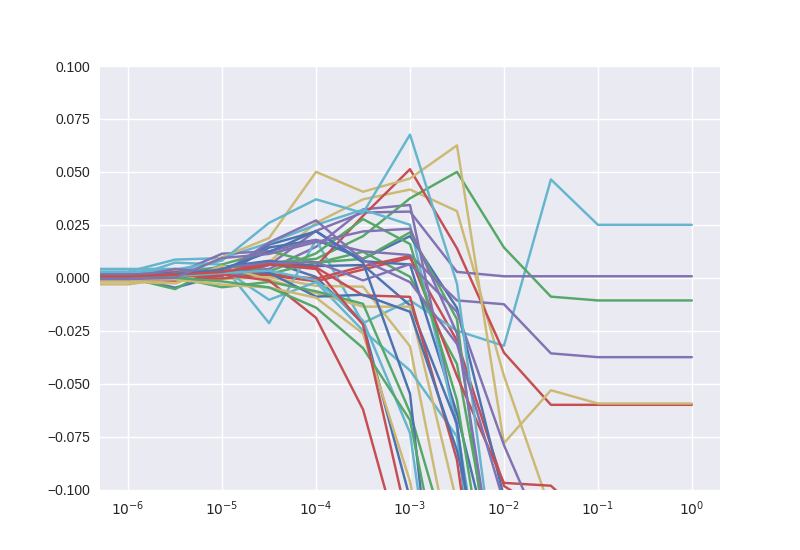

(-0.1, 0.1)

In [38]:

fig = plt.figure()
ax = fig.add_subplot(111)
for name, data in df_trace.items():
    data = data - data.iloc[0]
    ax.plot(data.index.get_level_values('alpha'), data, label=name[0])
ax.set_xscale('log')
ax.set_ylim([-0.1, 0.1])

In [ ]:
import seaborn as sns

sns.plot(data=df_trace)

In [ ]:
df_agg.query("model == 'logistic'")[test_name]